In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.table import Table
from astropy.timeseries import LombScargle
from astropy import time

In [2]:
lc_file_path = 'Output/Light_curve_001/4fgl_j0854.8+2006_lightcurve.fits'
emin = 0.1 *u.GeV
emax = 300 *u.GeV
D_l = 1588.6 *u.Mpc
hdul = fits.open('./' + lc_file_path)
lc = hdul[1].data

In [3]:
tmean = (lc['tmin_mjd'] + lc['tmax_mjd'])/2
flux = lc['flux']
flux_err = lc['flux_err']

In [4]:
max(lc['tmax_mjd']) - min(lc['tmin_mjd'])

2715.0

In [40]:
lsp = LombScargle(tmean, flux, flux_err)
min_freq = 1 / (max(lc['tmax_mjd']) - min(lc['tmin_mjd']))
max_freq = 10 / (max(lc['tmax_mjd']) - min(lc['tmin_mjd']))
frequency, power = lsp.autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
power_max = np.nanmax(power)
best_freq = frequency[np.argmax(power)]
print('Best frequency: ', best_freq)
print('Power at best frequency: ', power_max)
print('FAP Bootstrap: ', lsp.false_alarm_probability(power_max, method='bootstrap'))
print('FAP Davies: ', lsp.false_alarm_probability(power_max, method='davies'))
print('FAP baluev: ', lsp.false_alarm_probability(power_max, method='baluev'))
print('FAP naive: ', lsp.false_alarm_probability(power_max, method='naive'))

Best frequency:  0.0015314529417466316
Power at best frequency:  0.48276341212729645
FAP Bootstrap:  0.609
FAP Davies:  0.544400277820736
FAP baluev:  0.4198143159025075
FAP naive:  0.16883405170240942


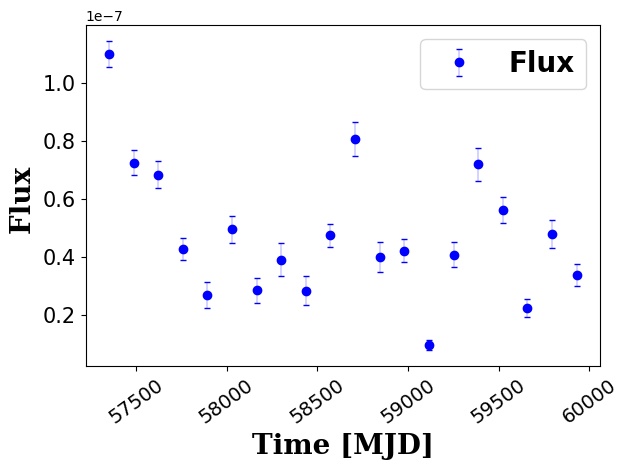

In [41]:
fig, ax = plt.subplots(1, 1, )#figsize=(12, 8))

font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

ax.errorbar(tmean, flux, yerr=0.5*flux_err, fmt='o', c='b', elinewidth=0.24, capsize=2, label='Flux')

# ax[1].errorbar(tmean, np.multiply(flux, avg_dists_2), yerr=np.multiply(0.5*(flux_err_up+flux_err_down), avg_dists_2), fmt='o', c='r', elinewidth=0.24, capsize=2, label='Flux $\\times$ D$\mathbf{^2}$')

ax.set_ylabel('Flux ', fontdict=axesfont)


# ax[1].set_ylabel('Flux $\\times$ D$\mathbf{^2}$\n [$\mathbf{10^6 AU^{2} cm^{-2} s^{-1}}$]', fontdict=axesfont)


ax.yaxis.set_tick_params(labelsize=15)
ax.legend(prop={'size':20, 'weight':'bold'})
    
# ax.set_xticks([])
ax.set_xlabel('Time [MJD]',  fontdict=axesfont)
# ax.set_xticks(tmean[::100])
ax.xaxis.set_tick_params(labelsize=14, rotation=36)
plt.tight_layout()
# plt.savefig('./outputs/timeseries_Super-K-original-data.pdf')
plt.show()

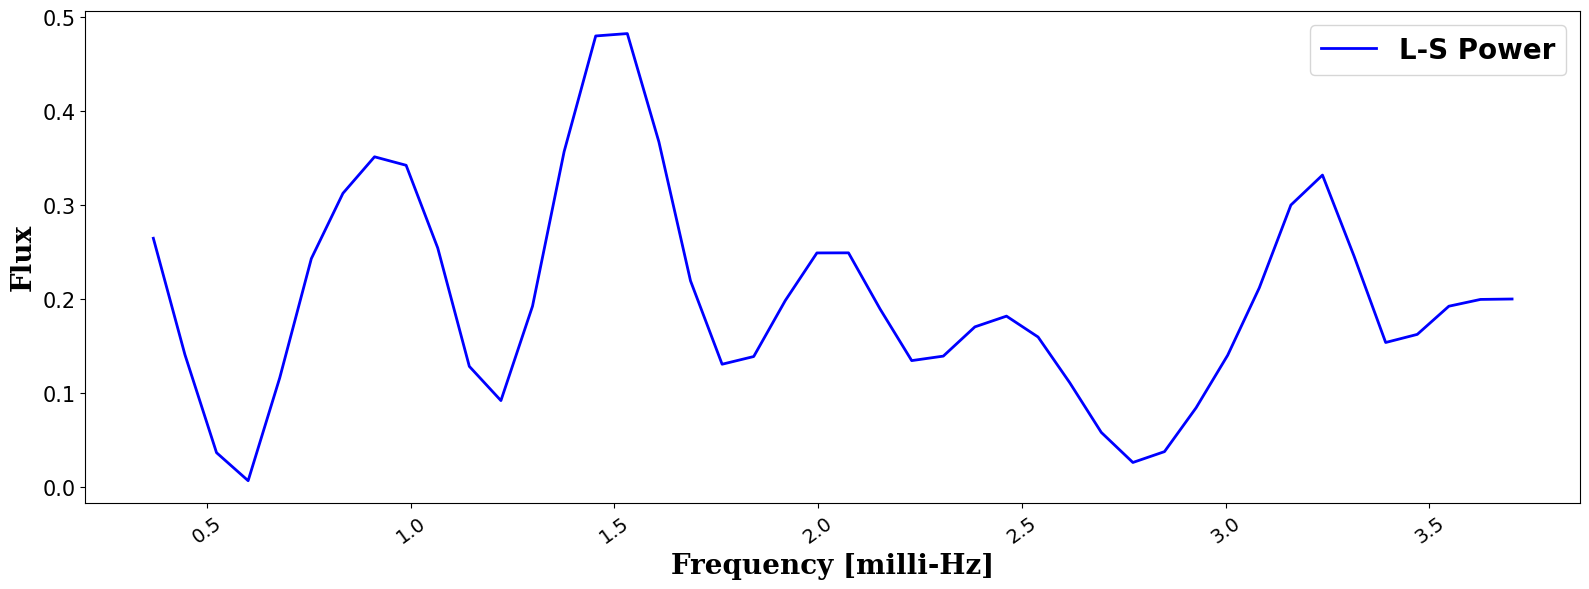

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
# ax.errorbar(tmean, flux, yerr=0.5*flux_err, fmt='o', c='b', elinewidth=0.24, capsize=2, label='Flux')
ax.plot(frequency*1000, power, '-', lw=2, c='b', label='L-S Power')
# ax[1].errorbar(tmean, np.multiply(flux, avg_dists_2), yerr=np.multiply(0.5*(flux_err_up+flux_err_down), avg_dists_2), fmt='o', c='r', elinewidth=0.24, capsize=2, label='Flux $\\times$ D$\mathbf{^2}$')

# ax.set_ylabel('Flux [$\mathbf{10^6 cm^{-2} s^{-1}}$]', fontdict=axesfont)
ax.set_ylabel('Flux', fontdict=axesfont)


# ax[1].set_ylabel('Flux $\\times$ D$\mathbf{^2}$\n [$\mathbf{10^6 AU^{2} cm^{-2} s^{-1}}$]', fontdict=axesfont)


ax.yaxis.set_tick_params(labelsize=15)
ax.legend(prop={'size':20, 'weight':'bold'})
    
# ax.set_xticks([])
ax.set_xlabel('Frequency [milli-Hz]',  fontdict=axesfont)
# ax.set_xticks(tmean[::100])
ax.xaxis.set_tick_params(labelsize=14, rotation=36)
plt.tight_layout()
# plt.savefig('./outputs/timeseries_Super-K-original-data.pdf')
plt.show()

In [44]:
min_freq = 1 / (max(lc['tmax_mjd']) - min(lc['tmin_mjd']))
max_freq = 40 / (max(lc['tmax_mjd']) - min(lc['tmin_mjd']))
frequency2, power2 = lsp.autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
power_max2 = np.nanmax(power2)
best_freq2 = frequency2[np.argmax(power2)]
print('Best frequency: ', best_freq2)
print('Power at best frequency: ', power_max2)
print('FAP Bootstrap: ', lsp.false_alarm_probability(power_max2, method='bootstrap'))
print('FAP Davies: ', lsp.false_alarm_probability(power_max2, method='davies'))
print('FAP baluev: ', lsp.false_alarm_probability(power_max2, method='baluev'))
print('FAP naive: ', lsp.false_alarm_probability(power_max2, method='naive'))

Best frequency:  0.01324028302801202
Power at best frequency:  0.49869072476480725
FAP Bootstrap:  0.5389999999999999
FAP Davies:  0.4307314922578679
FAP baluev:  0.3499691709417967
FAP naive:  0.13211294186935263


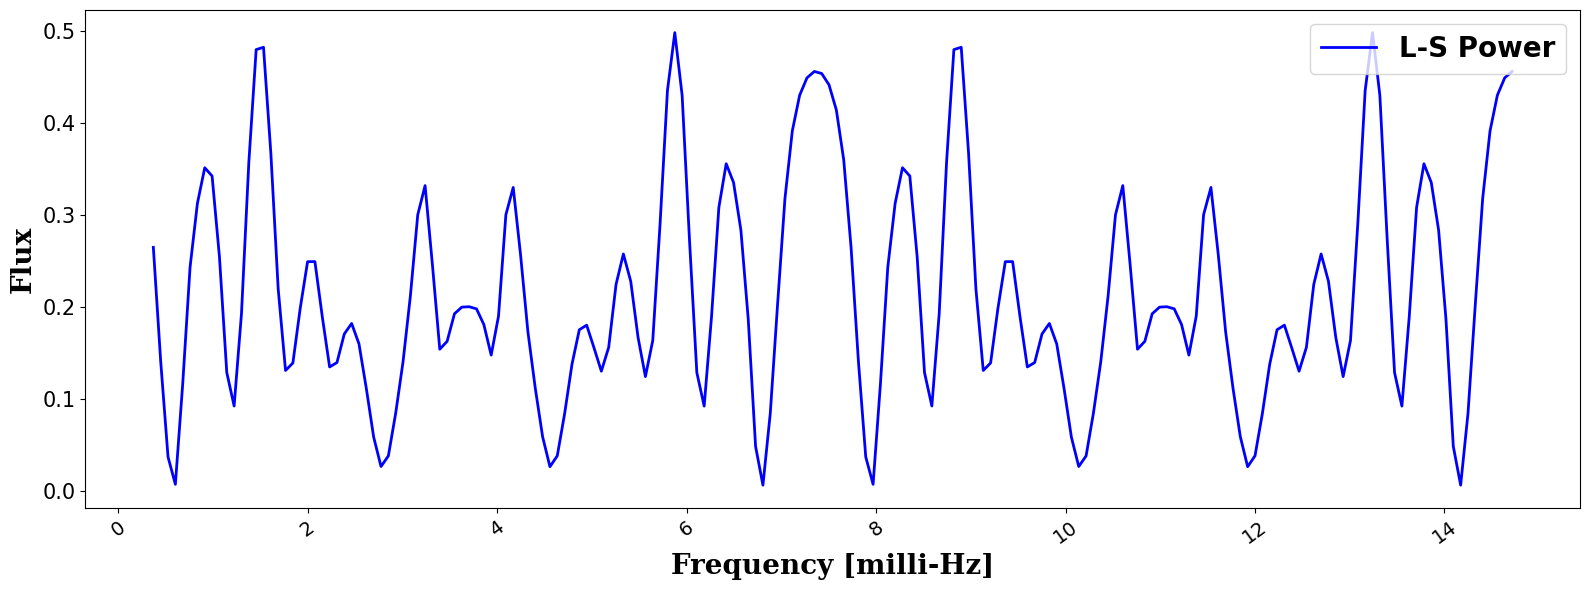

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
# ax.errorbar(tmean, flux, yerr=0.5*flux_err, fmt='o', c='b', elinewidth=0.24, capsize=2, label='Flux')
ax.plot(frequency2*1000, power2, '-', lw=2, c='b', label='L-S Power')
# ax[1].errorbar(tmean, np.multiply(flux, avg_dists_2), yerr=np.multiply(0.5*(flux_err_up+flux_err_down), avg_dists_2), fmt='o', c='r', elinewidth=0.24, capsize=2, label='Flux $\\times$ D$\mathbf{^2}$')

# ax.set_ylabel('Flux [$\mathbf{10^6 cm^{-2} s^{-1}}$]', fontdict=axesfont)
ax.set_ylabel('Flux', fontdict=axesfont)


# ax[1].set_ylabel('Flux $\\times$ D$\mathbf{^2}$\n [$\mathbf{10^6 AU^{2} cm^{-2} s^{-1}}$]', fontdict=axesfont)


ax.yaxis.set_tick_params(labelsize=15)
ax.legend(prop={'size':20, 'weight':'bold'})
    
# ax.set_xticks([])
ax.set_xlabel('Frequency [milli-Hz]',  fontdict=axesfont)
# ax.set_xticks(tmean[::100])
ax.xaxis.set_tick_params(labelsize=14, rotation=36)
plt.tight_layout()
# plt.savefig('./outputs/timeseries_Super-K-original-data.pdf')
plt.show()